In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

plt.style.use('seaborn-poster')

# Read data from CSV file
lungCancer_dataset = pd.read_csv('full-stack project/model/lungCancer.csv')
lungCancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
lungCancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [3]:
# Replace dictionary
dict = {'YES':1,
        'NO':0,
        'M':1,
        'F':0,
        2:1,
        1:0}

lungCancer_dataset_replaced = lungCancer_dataset.replace(dict)
lungCancer_dataset_replaced1 = lungCancer_dataset_replaced.drop(columns="AGE", axis=1)
lungCancer_dataset_replaced2 = lungCancer_dataset_replaced1.drop(columns="GENDER", axis=1)
lungCancer_dataset_replaced2.info()
lungCancer_dataset_replaced2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   SMOKING                309 non-null    int64
 1   YELLOW_FINGERS         309 non-null    int64
 2   ANXIETY                309 non-null    int64
 3   PEER_PRESSURE          309 non-null    int64
 4   CHRONIC DISEASE        309 non-null    int64
 5   FATIGUE                309 non-null    int64
 6   ALLERGY                309 non-null    int64
 7   WHEEZING               309 non-null    int64
 8   ALCOHOL CONSUMING      309 non-null    int64
 9   COUGHING               309 non-null    int64
 10  SHORTNESS OF BREATH    309 non-null    int64
 11  SWALLOWING DIFFICULTY  309 non-null    int64
 12  CHEST PAIN             309 non-null    int64
 13  LUNG_CANCER            309 non-null    int64
dtypes: int64(14)
memory usage: 33.9 KB


,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [4]:
x = lungCancer_dataset_replaced2[lungCancer_dataset_replaced2.columns[:13]]
y = lungCancer_dataset_replaced2['LUNG_CANCER']

In [5]:
from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

X_train

array([[ 0.88083033, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-1.13529242, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [-1.13529242,  0.86929961, -0.99676897, ...,  0.74873631,
        -0.94029056, -1.12047956],
       ...,
       [ 0.88083033,  0.86929961,  1.0032415 , ...,  0.74873631,
         1.06350105, -1.12047956],
       [ 0.88083033, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056, -1.12047956],
       [ 0.88083033, -1.15035137, -0.99676897, ...,  0.74873631,
        -0.94029056,  0.892475  ]])

In [7]:
X_train.shape
X_test.shape

(62, 13)

In [8]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC(kernel='linear',degree=3,C=1.0)
clf.fit(X_train,y_train)

# plot the decision boundaries
W = clf.coef_[0]
b = clf.intercept_[0]

# W1*X1 + W2*X2 + B = 0 ====> X2 = -(B + W1*X1)/W2
x_0 = np.linspace(0,5.5,200)
decision_boundary = -W[0]/W[1] * x_0 - b/W[1]

x = lungCancer_dataset_replaced2[lungCancer_dataset_replaced2.columns[:13]]
y = lungCancer_dataset_replaced2['LUNG_CANCER']

# Support Vectors
margin = 2/W[1]
gutter_up = decision_boundary + 0.5*margin
gutter_down = decision_boundary - 0.5*margin
SVS = clf.support_vectors_

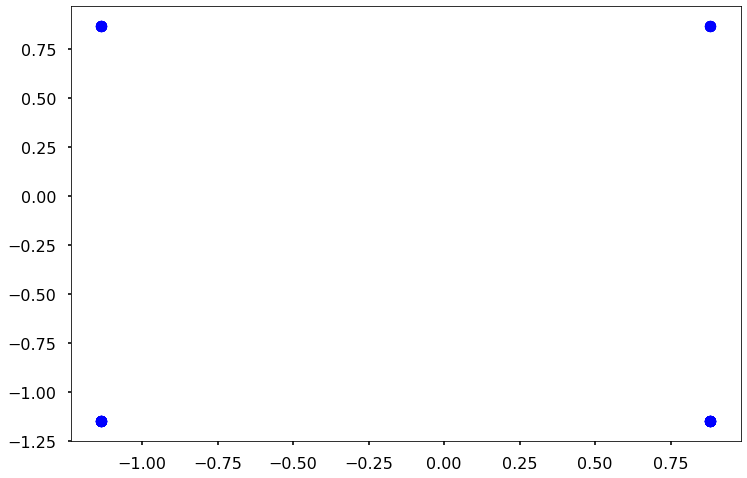

In [9]:
plt.figure(figsize=(12,8))

plt.plot(X_train[:,0][y_train == 0], X_train[:,1][y_train == 0],'bo')
plt.show()

In [10]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

NameError: name 'confusion_matrix' is not defined

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.967741935483871

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test_pred = clf.predict(X_test)
training_data_accuracy = accuracy_score(X_test_pred, y_test)
accuracy = training_data_accuracy * 100

print('Accuracy : %.1f' %accuracy + '%')

Accuracy : 96.8%


In [ ]:
C = 1.0
linear_svc = sv

In [ ]:
lungCancer_dataset_replaced2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   SMOKING                309 non-null    int64
 1   YELLOW_FINGERS         309 non-null    int64
 2   ANXIETY                309 non-null    int64
 3   PEER_PRESSURE          309 non-null    int64
 4   CHRONIC DISEASE        309 non-null    int64
 5   FATIGUE                309 non-null    int64
 6   ALLERGY                309 non-null    int64
 7   WHEEZING               309 non-null    int64
 8   ALCOHOL CONSUMING      309 non-null    int64
 9   COUGHING               309 non-null    int64
 10  SHORTNESS OF BREATH    309 non-null    int64
 11  SWALLOWING DIFFICULTY  309 non-null    int64
 12  CHEST PAIN             309 non-null    int64
 13  LUNG_CANCER            309 non-null    int64
dtypes: int64(14)
memory usage: 33.9 KB


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#input = (1,0,1,0,1,0,1,0,1,0,1,0,1)
#input = (0,0,0,0,0,0,1,0,1,0,1,0,0)
input = (1,1,1,0,0,0,0,1,1,0,1,0,1)

input_as_array = np.asanyarray(input)
input_reshape = input_as_array.reshape(1,-1)

std_data = scaler.transform(input_reshape)
#print(std_data)

prediction = clf.predict(std_data)

X_test_pred = clf.predict(std_data)
training_data_accuracy = accuracy_score(X_test_pred, prediction)
accuracy = training_data_accuracy * 100

print('Accuracy : %.1f' %accuracy + '%')

if (prediction == 1):
  print('This patient possibly positive lung cancer')
else:
  print('This patient possibly negative lung cancer')

Accuracy : 100.0%
This patient possibly negative lung cancer


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def cancer_predict(
  smoke,
  yellow_finger,
  anxious,
  friends,
  chronic_disease,
  fatigue,
  allergies,
  wheezing,
  alcohol,
  cough,
  breath,
  swallowing,
  chest_pain
):
  if(smoke == -2): smoke = 0
  else: smoke = 1
  
  if(yellow_finger == -2): yellow_finger = 0
  else: yellow_finger = 1
  
  if(anxious == -2): anxious = 0
  else: anxious = 1
  
  if(friends == -2): friends = 0
  else: friends = 1
  
  if(chronic_disease == -2): chronic_disease = 0
  else: chronic_disease = 1
  
  if(fatigue == -2): fatigue = 0
  else: fatigue = 1
  
  if(allergies == -2): allergies = 0
  else: allergies = 1
  
  if(wheezing == -2): wheezing = 0
  else: wheezing = 1
  
  if(alcohol == -2): alcohol = 0
  else: alcohol = 1
  
  if(cough == -2): cough = 0
  else: cough = 1
  
  if(breath == -2): breath = 0
  else: breath = 1
  
  if(swallowing == -2): swallowing = 0
  else: swallowing = 1
  
  if(chest_pain == -2): chest_pain = 0
  else: chest_pain = 1
  
  input = [
    smoke,
    yellow_finger,
    anxious,
    friends,
    chronic_disease,
    fatigue,
    allergies,
    wheezing,
    alcohol,
    cough,
    breath,
    swallowing,
    chest_pain
  ]
  
  input_as_array = np.asarray(input)
  input_reshape = input_as_array.reshape(1,-1)

  std_data = scaler.transform(input_reshape)
  prediction = clf.predict(std_data)

  if (prediction == 1):
    return 'This patient possibly positive lung cancer'
  elif (prediction == 0):
    return 'This patient possibly negative lung cancer'
  else:
    return 'Wrong input!'
  

In [ ]:
cancer_predict(-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient possibly negative lung cancer'

In [ ]:
import anvil.server

anvil.server.connect("NGYRTN76HI6JORSCUQFVKJO7-7ESA5W76U4YVFPHB")

@anvil.server.callable
def cancer_predict(
  smoke,
  yellow_finger,
  anxious,
  friends,
  chronic_disease,
  fatigue,
  allergies,
  wheezing,
  alcohol,
  cough,
  breath,
  swallowing,
  chest_pain
):
  if(smoke == 'NO'): smoke = 0
  elif(smoke == 'YES'): smoke = 1
  
  if(yellow_finger == 'NO'): yellow_finger = 0
  elif(yellow_finger == 'YES'): yellow_finger = 1
  
  if(anxious == 'NO'): anxious = 0
  elif(anxious == 'YES'): anxious = 1
  
  if(friends == 'NO'): friends = 0
  elif(friends == 'YES'): friends = 1
  
  if(chronic_disease == 'NO'): chronic_disease = 0
  elif(chronic_disease == 'YES'): chronic_disease = 1
  
  if(fatigue == 'NO'): fatigue = 0
  elif(fatigue == 'YES'): fatigue = 1
  
  if(allergies == 'NO'): allergies = 0
  elif(allergies == 'YES'): allergies = 1
  
  if(wheezing == 'NO'): wheezing = 0
  elif(wheezing == 'YES'): wheezing = 1
  
  if(alcohol == 'NO'): alcohol = 0
  elif(alcohol == 'YES'): alcohol = 1
  
  if(cough == 'NO'): cough = 0
  elif(cough == 'YES'): cough = 1
  
  if(breath == 'NO'): breath = 0
  elif(breath == 'YES'): breath = 1
  
  if(swallowing == 'NO'): swallowing = 0
  elif(swallowing == 'YES'): swallowing = 1
  
  if(chest_pain == 'NO'): chest_pain = 0
  elif(chest_pain == 'YES'): chest_pain = 1
  
  input = [
    smoke,
    yellow_finger,
    anxious,
    friends,
    chronic_disease,
    fatigue,
    allergies,
    wheezing,
    alcohol,
    cough,
    breath,
    swallowing,
    chest_pain
  ]
  
  input_as_array = np.asarray(input)
  input_reshape = input_as_array.reshape(1,-1)

  std_data = scaler.transform(input_reshape)
  prediction = clf.predict(std_data)

  if (prediction == 1):
    return 'This patient possibly positive lung cancer'
  elif (prediction == 0):
    return 'This patient possibly negative lung cancer'
  else:
    return 'Wrong input!'

Connecting to wss://anvil.works/uplink


gaierror: [Errno 11001] getaddrinfo failed

In [ ]:
anvil.server.wait_forever()

Exception in thread Thread-4 (heartbeat_until_reopened):
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\anvil\server.py", line 405, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\anvil\server.py", line 395, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler wa

KeyboardInterrupt: 

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
